In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [47]:
from fastai.vision import *
from fastai import *
import shutil
import os
from tqdm import tqdm_notebook as tqdm
import cv2

In [10]:
ls

apls_environment.yml           move_and_rename_spacenet.ipynb  src/
combine_spacenet_w_mass.ipynb  README.md                       Untitled1.ipynb
example_output_ims/            sample_data/                    Untitled.ipynb


In [13]:
# Defining all relevant paths

PATH = Path('/home/akash/Roads/massachusetts/train/')
IMAGES = PATH/'sat'
MASKS = PATH/'map'
OUT_DIR = Path('/home/akash/Roads/spacenet/FINAL_DATA/')
OUT_IM = OUT_DIR/'images'
OUT_MSK = OUT_DIR/'masks_1'

In [16]:
#Checking to see if image names correspond exactly to mask names
ims = sorted([o.name for o in IMAGES.ls()])
msks = sorted([o.name for o in MASKS.ls()])
ims[0], msks[0]
#del ims, msks

('10078660_15.tiff', '10078660_15.tif')

### Experimentation

In [40]:
sample = IMAGES.ls()[0]

In [41]:
sample

PosixPath('/home/akash/Roads/massachusetts/train/sat/mass_22828930_15.tiff')

In [20]:
sample.parent

PosixPath('/home/akash/Roads/massachusetts/train/sat')

In [31]:
sample.rename(sample.parent/('Shanghai_'+sample.name))

In [32]:
sample

PosixPath('example_output_ims/AOI_4_Shanghai_Roads_Train/masks_2m/mask_img1356.png')

In [38]:
modify_ext(sample, '.tif')

### Formatting the dataset

In [34]:
def modify_ext(f, new_ext):
    f.rename(f.parent/(f.stem + new_ext))

In [25]:
def prefix_file(f, prefix):
    f.rename(f.parent/(prefix + f.name))

In [26]:
def add_prefix(path, prefix):
    for f in tqdm(path.ls()):
        prefix_file(f, prefix)
    

In [27]:
PREFIX = 'mass_'
add_prefix(IMAGES, PREFIX)

In [28]:
add_prefix(MASKS, PREFIX)

In [43]:
def change_ext(path, new_ext):
    for f in tqdm(path.ls()):
        modify_ext(f, new_ext)

In [44]:
EXT = '.tif'
change_ext(IMAGES, EXT)

### Need to convert masks to PNGs
___
##### Experimentation

In [48]:
MASKS

PosixPath('/home/akash/Roads/massachusetts/train/map')

In [49]:
msk = cv2.imread(str(MASKS.ls()[0]))

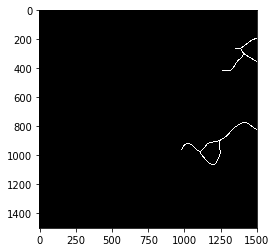

In [50]:
plt.imshow(msk)

In [52]:
np.unique(msk)
#This means we need to divide each mask by 255 to get it's values to be [0,1]. This will be needed to fit our model

array([  0, 255], dtype=uint8)

In [55]:
NEW_MASKS = PATH/'masks_png'
NEW_MASKS.mkdir(exist_ok=True)

In [56]:
PATH.ls()

[PosixPath('/home/akash/Roads/massachusetts/train/masks_png'),
 PosixPath('/home/akash/Roads/massachusetts/train/models'),
 PosixPath('/home/akash/Roads/massachusetts/train/tmp'),
 PosixPath('/home/akash/Roads/massachusetts/train/map'),
 PosixPath('/home/akash/Roads/massachusetts/train/sat')]

In [57]:
def save_ext(f, img, OUT=NEW_MASKS, ext='.png'):
    f_new = str(OUT/(f.stem + ext))
    cv2.imwrite(f_new, img)

In [58]:
save_ext(MASKS.ls()[0], msk)
# This works

In [60]:
for i in tqdm(MASKS.ls()):
    img = cv2.imread(str(i))
    img = (img / 255).astype(float)
    save_ext(i, img)